In [1]:
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_court(projected_points, projected_player1, projected_player2):
    """
    Visualize a tennis court with keypoints, lines, and net.
    A green background will surround the court by 1m, and a blue rectangle for the tennis court.
    
    Args:
    - projected_points: A numpy array with the projected keypoints of the court.
                        (expected shape (4, 2) for four corner points).
    """
    # Unpack the projected points for easy access
    projected_keypoint1, projected_keypoint2, projected_keypoint3, projected_keypoint4 = projected_points
    
    # Calculate the court boundaries (min/max for x and y)
    min_x = min(projected_keypoint1[0], projected_keypoint2[0], projected_keypoint3[0], projected_keypoint4[0])
    max_x = max(projected_keypoint1[0], projected_keypoint2[0], projected_keypoint3[0], projected_keypoint4[0])
    min_y = min(projected_keypoint1[1], projected_keypoint2[1], projected_keypoint3[1], projected_keypoint4[1])
    max_y = max(projected_keypoint1[1], projected_keypoint2[1], projected_keypoint3[1], projected_keypoint4[1])
    
    # Court dimensions
    court_width = 10.97  # Court width in meters
    court_length = 23.78 # Court length in meters
    margin = 1.0         # 1 meter margin around the court

    # Tennis lines based on actual dimensions from the image
    # Service box lengths
    service_box_length = 6.40 # Distance from net to service line
    
    # Center service line (length between service boxes)
    center_service_line = court_width / 2.0
    
    # Net position (middle of the court length)
    net_position = court_length / 2.0
    
    # Plot the court visualization
    fig, ax = plt.subplots()

    # Plot green background surrounding the court by 1 meter on each side
    ax.add_patch(plt.Rectangle((min_x - margin, min_y - margin), 
                               court_length + 2 * margin, court_width + 2 * margin, 
                               color='green', alpha=0.3, label='Background'))

    # Plot blue tennis court
    ax.add_patch(plt.Rectangle((min_x, min_y), court_length, court_width, 
                               color='blue', alpha=0.5, label='Tennis Court'))
    
    # Plot the net (wide gray line in the middle)
    ax.plot([min_x + net_position, min_x + net_position], 
            [min_y, min_y + court_width], color='white', linewidth=4, label='Net')
    
    # Plot the service lines
    # Left service line
    ax.plot([min_x + net_position - service_box_length, min_x + net_position - service_box_length],
            [min_y, min_y + court_width], color='white', label='Service Line')
    
    # Right service line
    ax.plot([min_x + net_position + service_box_length, min_x + net_position + service_box_length],
            [min_y, min_y + court_width], color='white')
    
    # Plot the center service line (dividing the service boxes)
    ax.plot([min_x + net_position - service_box_length, min_x + net_position + service_box_length], 
            [min_y + center_service_line, min_y + center_service_line], color='white', label='Center Service Line')

    # Plot the baseline (back of the court)
    ax.plot([min_x, min_x + court_length], [min_y, min_y], color='white', linewidth=2, label='Baseline')
    ax.plot([min_x, min_x + court_length], [min_y + court_width, min_y + court_width], color='white')

    # Plot the singles sidelines (left and right edges of the court)
    ax.plot([min_x, min_x], [min_y, min_y + court_width], color='white', linewidth=2, label='Singles Sideline')
    ax.plot([min_x + court_length, min_x + court_length], [min_y, min_y + court_width], color='white')
    
    # Plot keypoints
    ax.scatter(*projected_keypoint1, color='red', label='Projected Red')
    ax.scatter(*projected_keypoint2, color='green', label='Projected Green')
    ax.scatter(*projected_keypoint3, color='blue', label='Projected Blue')
    ax.scatter(*projected_keypoint4, color='yellow', label='Projected Yellow')

    # Annotating the points
    for i, txt in enumerate(["Red", "Green", "Blue", "Yellow"]):
        ax.annotate(txt, (projected_points[i, 0], projected_points[i, 1]))
        
    # Plot the players with larger markers
    ax.scatter(*projected_player1, color='orange', s=100, label='Player 1')
    ax.scatter(*projected_player2, color='pink', s=100, label='Player 2')

    # Label and plot details
    ax.set_title("Tennis Court Visualization with Net and Lines")
    ax.set_xlabel("Court Length (meters)")
    ax.set_ylabel("Court Width (meters)")

    # Set axis limits with some margin
    ax.set_xlim(min_x - margin - 1, max_x + margin + 1)
    ax.set_ylim(min_y - margin - 1, max_y + margin + 1)
    
    # Equal aspect ratio
    ax.set_aspect('equal')

    # legend off
    ax.legend().set_visible(False)
    
    # Show the plot
    plt.show()


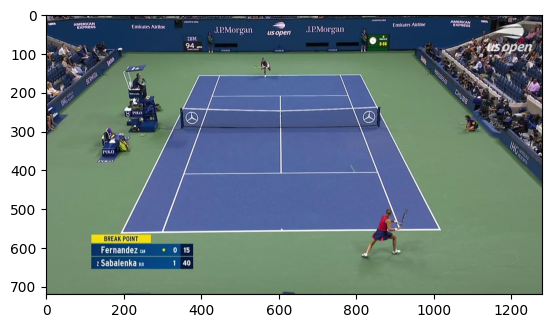

In [3]:
# load test image
img = Image.open('test2.jpg')

# visualize the image
plt.imshow(img)

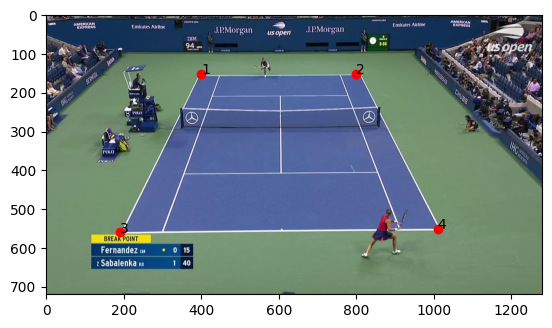

In [4]:
keypoint1 = (400, 150)
keypoint2 = (800, 150)
keypoint3 = (190, 560)
keypoint4 = (1010, 550)
# keypoint5 = (350, 300)
# keypoint6 = (860, 300)

# draw the loaded test image 
img = plt.imread('test2.jpg')
plt.imshow(img)

# draw keypoints with labels 1, 2, 3, 4, 5, 6
plt.scatter(*keypoint1, color='red')
plt.scatter(*keypoint2, color='red')
plt.scatter(*keypoint3, color='red')
plt.scatter(*keypoint4, color='red')

# add labels to the keypoints
plt.annotate('1', (keypoint1[0], keypoint1[1]))
plt.annotate('2', (keypoint2[0], keypoint2[1]))
plt.annotate('3', (keypoint3[0], keypoint3[1]))
plt.annotate('4', (keypoint4[0], keypoint4[1]))
# plt.scatter(*keypoint5, color='purple')
# plt.scatter(*keypoint6, color='orange')

plt.show()

(-0.5, 799.5, 1639.5, -0.5)

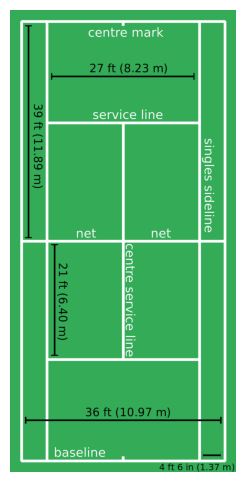

In [5]:
tennis_court = Image.open('tenniscourt.png')

plt.figure(figsize=(6, 6))
plt.imshow(tennis_court)
plt.axis('off')

In [6]:
# calculate homography matrix for the keypoints to the tennis court
import numpy as np
from numpy.linalg import inv

# define the keypoints in the tennis court image
court_keypoint1 = (23.78, 0)
court_keypoint2 = (23.78, 10.97)
court_keypoint3 = (0, 0)
court_keypoint4 = (0, 10.97)

In [7]:
import cv2

# calculate homography matrix
pts_src = np.array([keypoint1, keypoint2, keypoint3, keypoint4])
pts_dst = np.array([court_keypoint1, court_keypoint2, court_keypoint3, court_keypoint4])

h, status = cv2.findHomography(pts_src, pts_dst)
h_inv = inv(h)

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image keypoints (detected points in the image)
image_points = np.array([
    [400, 150],  # Keypoint 1 (Red)
    [800, 150],  # Keypoint 2 (Green)
    [190, 560],  # Keypoint 3 (Blue)
    [1010, 550], # Keypoint 4 (Yellow)
], dtype="float32")

# Real-world court keypoints (in meters)
court_points = np.array([
    [23.78, 0],     # Keypoint 1 (top-left)
    [23.78, 10.97], # Keypoint 2 (top-right)
    [0, 0],         # Keypoint 3 (bottom-left)
    [0, 10.97],     # Keypoint 4 (bottom-right)
], dtype="float32")

# Compute homography matrix
H, _ = cv2.findHomography(image_points, court_points)

In [9]:
# Function to project points using the homography matrix
def project_point(point, H):
    point = np.array([point[0], point[1], 1.0])  # Convert to homogeneous coordinates
    projected_point = np.dot(H, point)
    projected_point /= projected_point[2]  # Normalize
    return projected_point[:2]  # Return the (x, y) coordinates

In [10]:
# Test the projection for keypoint1 (Red)
projected_keypoint1 = project_point((400, 150), H)
projected_keypoint2 = project_point((800, 150), H)
projected_keypoint3 = project_point((190, 560), H)
projected_keypoint4 = project_point((1010, 550), H)

# Print projected keypoints
print(f"Projected keypoint 1 (red): {projected_keypoint1}")
print(f"Projected keypoint 2 (green): {projected_keypoint2}")
print(f"Projected keypoint 3 (blue): {projected_keypoint3}")
print(f"Projected keypoint 4 (yellow): {projected_keypoint4}")

Projected keypoint 1 (red): [2.37800007e+01 4.44319342e-15]
Projected keypoint 2 (green): [23.78000069 10.97000027]
Projected keypoint 3 (blue): [-2.15362298e-15  3.23043447e-15]
Projected keypoint 4 (yellow): [ 0.         10.97000027]


### player 1

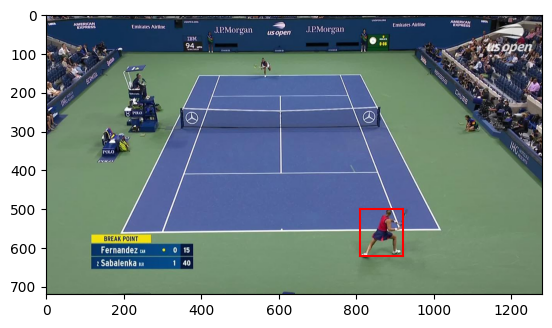

In [11]:
player1_bbox = (810, 620, 920, 500)

player1_position = ((player1_bbox[0] + player1_bbox[2]) / 2, player1_bbox[1]) # middle of the feet

img = plt.imread('test2.jpg')
plt.imshow(img)

# draw the bounding box
plt.plot([player1_bbox[0], player1_bbox[0]], [player1_bbox[1], player1_bbox[3]], color='red')
plt.plot([player1_bbox[0], player1_bbox[2]], [player1_bbox[3], player1_bbox[3]], color='red')
plt.plot([player1_bbox[2], player1_bbox[2]], [player1_bbox[1], player1_bbox[3]], color='red')
plt.plot([player1_bbox[0], player1_bbox[2]], [player1_bbox[1], player1_bbox[1]], color='red')

plt.show()

Using cache found in /Users/lucijaaleksic/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-3 Python-3.10.13 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


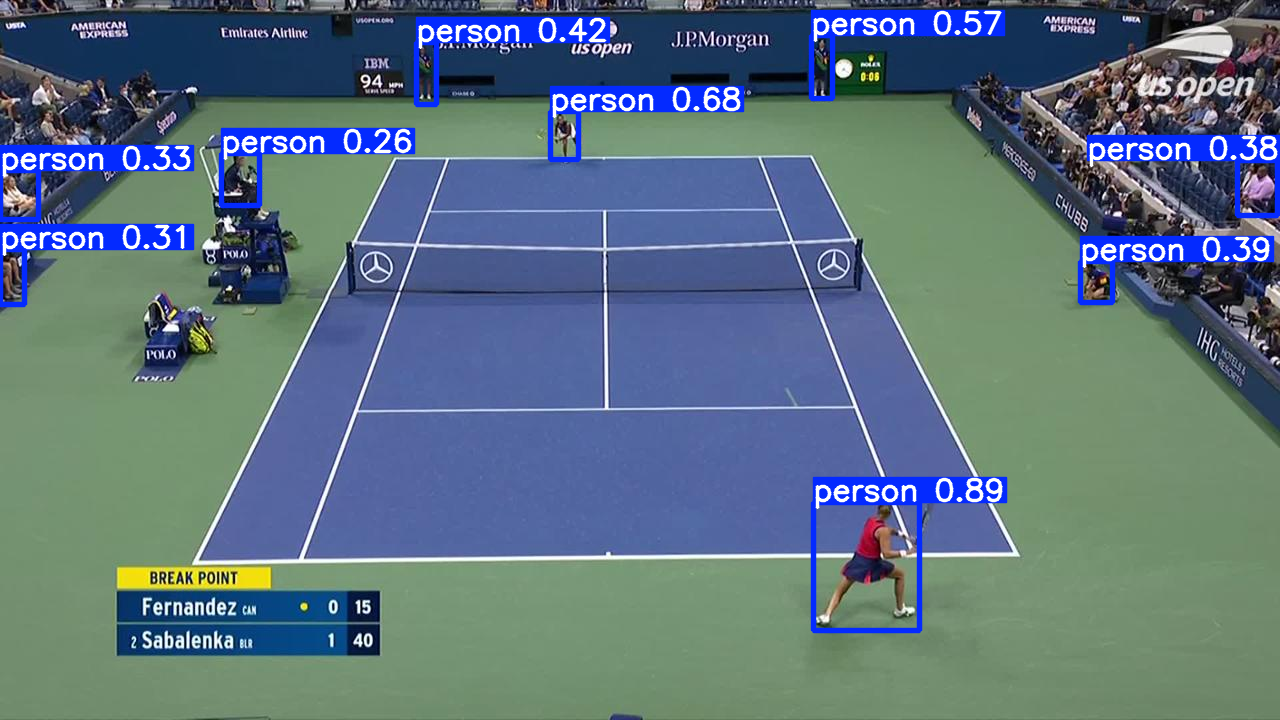

In [12]:
import torch

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use 'yolov5s' for small model
results = model(img)

# # Plot the results
results.show()  # This will show the detected objects (humans, in our case)
plt.close('all')  # Close any open windows, especially those from the YOLO results

In [13]:
# take the top 2 detected objects
player1_bbox = results.pandas().xyxy[0].iloc[0]
player2_bbox = results.pandas().xyxy[0].iloc[1]

print(player2_bbox)

player1_position = ((player1_bbox[0] + player1_bbox[2]) / 2, player1_bbox[1]) # middle of the feet
player2_position = ((player2_bbox[0] + player2_bbox[2]) / 2, player2_bbox[1])

project_player1 = project_point(player1_position, H)
project_player2 = project_point(player2_position, H)

xmin          550.464722
ymin          111.622955
xmax          578.989014
ymax          159.598114
confidence      0.678911
class                  0
name              person
Name: 1, dtype: object


In [14]:
project_player2

array([     28.904,      4.3865])

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_court(projected_points, projected_player1, projected_player2):
    """
    Visualize a tennis court with keypoints, lines, and net.
    A green background will surround the court by 1m, and a blue rectangle for the tennis court.
    
    Args:
    - projected_points: A numpy array with the projected keypoints of the court.
                        (expected shape (4, 2) for four corner points).
    """
    # Unpack the projected points for easy access
    projected_keypoint1, projected_keypoint2, projected_keypoint3, projected_keypoint4 = projected_points
    
    # Calculate the court boundaries (min/max for x and y)
    min_x = min(projected_keypoint1[0], projected_keypoint2[0], projected_keypoint3[0], projected_keypoint4[0])
    max_x = max(projected_keypoint1[0], projected_keypoint2[0], projected_keypoint3[0], projected_keypoint4[0])
    min_y = min(projected_keypoint1[1], projected_keypoint2[1], projected_keypoint3[1], projected_keypoint4[1])
    max_y = max(projected_keypoint1[1], projected_keypoint2[1], projected_keypoint3[1], projected_keypoint4[1])
    
    # Court dimensions
    court_width = 10.97  # Court width in meters
    court_length = 23.78 # Court length in meters
    margin = 1.0         # 1 meter margin around the court

    # Tennis lines based on actual dimensions from the image
    # Service box lengths
    service_box_length = 6.40 # Distance from net to service line
    
    # Center service line (length between service boxes)
    center_service_line = court_width / 2.0
    
    # Net position (middle of the court length)
    net_position = court_length / 2.0
    
    # Plot the court visualization
    fig, ax = plt.subplots()

    # Plot green background surrounding the court by 1 meter on each side
    ax.add_patch(plt.Rectangle((min_x - margin, min_y - margin), 
                               court_length + 2 * margin, court_width + 2 * margin, 
                               color='green', alpha=0.3, label='Background'))

    # Plot blue tennis court
    ax.add_patch(plt.Rectangle((min_x, min_y), court_length, court_width, 
                               color='blue', alpha=0.5, label='Tennis Court'))
    
    # Plot the net (wide gray line in the middle)
    ax.plot([min_x + net_position, min_x + net_position], 
            [min_y, min_y + court_width], color='white', linewidth=4, label='Net')
    
    # Plot the service lines
    # Left service line
    ax.plot([min_x + net_position - service_box_length, min_x + net_position - service_box_length],
            [min_y, min_y + court_width], color='white', label='Service Line')
    
    # Right service line
    ax.plot([min_x + net_position + service_box_length, min_x + net_position + service_box_length],
            [min_y, min_y + court_width], color='white')
    
    # Plot the center service line (dividing the service boxes)
    ax.plot([min_x + net_position - service_box_length, min_x + net_position + service_box_length], 
            [min_y + center_service_line, min_y + center_service_line], color='white', label='Center Service Line')

    # Plot the baseline (back of the court)
    ax.plot([min_x, min_x + court_length], [min_y, min_y], color='white', linewidth=2, label='Baseline')
    ax.plot([min_x, min_x + court_length], [min_y + court_width, min_y + court_width], color='white')

    # Plot the singles sidelines (left and right edges of the court)
    ax.plot([min_x, min_x], [min_y, min_y + court_width], color='white', linewidth=2, label='Singles Sideline')
    ax.plot([min_x + court_length, min_x + court_length], [min_y, min_y + court_width], color='white')
    
    # Plot keypoints
    ax.scatter(*projected_keypoint1, color='red', label='Projected Red')
    ax.scatter(*projected_keypoint2, color='green', label='Projected Green')
    ax.scatter(*projected_keypoint3, color='blue', label='Projected Blue')
    ax.scatter(*projected_keypoint4, color='yellow', label='Projected Yellow')

    # Annotating the points
    for i, txt in enumerate(["Red", "Green", "Blue", "Yellow"]):
        ax.annotate(txt, (projected_points[i, 0], projected_points[i, 1]))
        
#     # Plot the players with larger markers
#     ax.scatter(*projected_player1, color='orange', s=100, label='Player 1')
#     ax.scatter(*projected_player2, color='pink', s=100, label='Player 2')

    # Label and plot details
    ax.set_title("Tennis Court Visualization with Net and Lines")
    ax.set_xlabel("Court Length (meters)")
    ax.set_ylabel("Court Width (meters)")

    # Set axis limits with some margin
    ax.set_xlim(min_x - margin - 1, max_x + margin + 1)
    ax.set_ylim(min_y - margin - 1, max_y + margin + 1)
    
    # Equal aspect ratio
    ax.set_aspect('equal')

    # legend off
    ax.legend().set_visible(False)
    
    # Show the plot
    plt.show()

visualize_court(np.array([projected_keypoint1, projected_keypoint2, projected_keypoint3, projected_keypoint4]), project_player1, project_player2)

In [16]:
# visualize the court with the players
import matplotlib.pyplot as plt

# Calculate the court boundaries (min/max for x and y)
min_x = min(projected_keypoint1[0], projected_keypoint2[0], projected_keypoint3[0], projected_keypoint4[0])
max_x = max(projected_keypoint1[0], projected_keypoint2[0], projected_keypoint3[0], projected_keypoint4[0])
min_y = min(projected_keypoint1[1], projected_keypoint2[1], projected_keypoint3[1], projected_keypoint4[1])
max_y = max(projected_keypoint1[1], projected_keypoint2[1], projected_keypoint3[1], projected_keypoint4[1])

# Court dimensions
court_width = 10.97  # Court width in meters
court_length = 23.78 # Court length in meters
margin = 1.0         # 1 meter margin around the court

# Tennis lines based on actual dimensions from the image
# Service box lengths
service_box_length = 6.40 # Distance from net to service line

# Center service line (length between service boxes)
center_service_line = court_width / 2.0

# Net position (middle of the court length)
net_position = court_length / 2.0

In [17]:
x = np.linspace(0, 10, 100)
y = 3 * x + 2

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y = 3x + 2')
plt.show()